#Stock Price prediction using Yahoo Finance

#Exploratory Data Analysis of Yahoo Finance Dataset

The Yahoo Finance dataset provides historical stock market data for publicly traded companies. It includes various financial metrics for each stock, such as:

- Date: The trading date.
- Open: The price at which the stock opened on the trading day.
- High: The highest price of the stock during the day.
- Low: The lowest price of the stock during the day.
- Close: The final price of the stock when the trading day ended.
- Adj Close: The adjusted closing price, which accounts for dividends and stock splits.
- Volume: The number of shares traded during the day.

[*********************100%***********************]  1 of 1 completed


First few rows of the dataset:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876122  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400543  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200

Summary statistics:
             Open        High         Low       Close   Adj Close  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   130.231998  131.892775  128.614983  130.311812  128.081748   
std     30.596429   30.841435   30.287325   30.566496   30.528398   
min     57.020000   57.125000   53.152500   56.092499   54.569733   
25%    115.924374  117.275000  114.129997  115.739374  113.10571

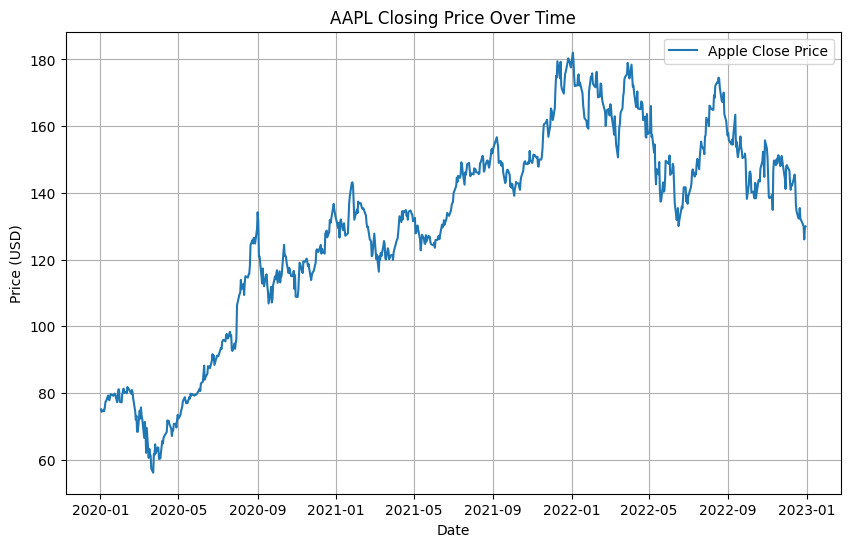

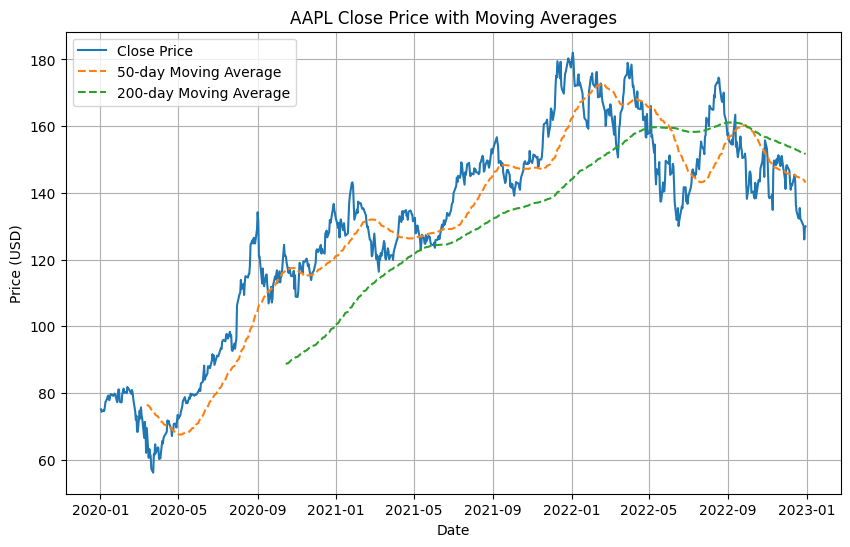

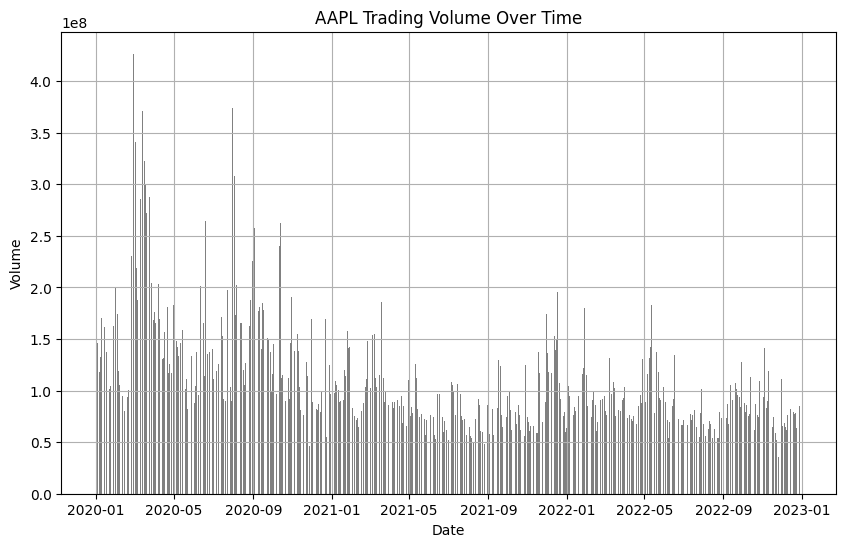

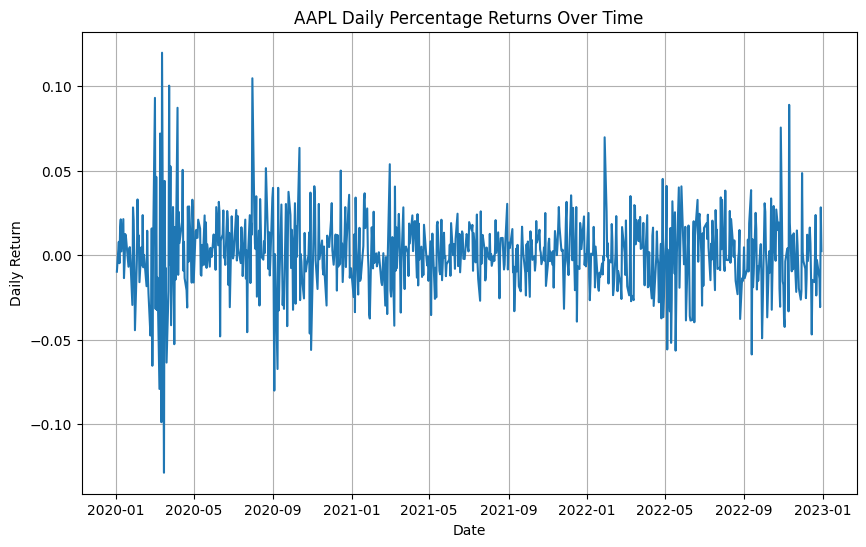

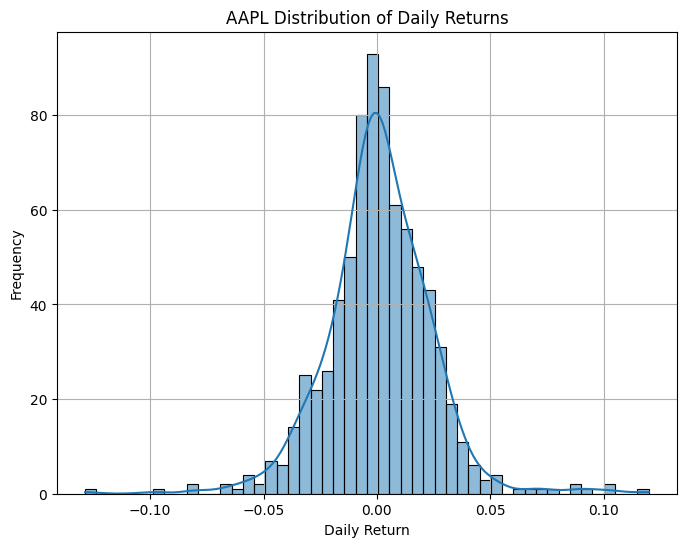

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Apple stock data from Yahoo Finance
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# 2. Basic Exploratory Data Analysis
print("First few rows of the dataset:")
print(stock_data.head())

print("\nSummary statistics:")
print(stock_data.describe())

print("\nCheck for missing values:")
print(stock_data.isnull().sum())

# 3. Plot stock closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Apple Close Price')
plt.title(f"{ticker} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# 4. Calculate and plot moving averages (50-day and 200-day)
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['50_MA'], label='50-day Moving Average', linestyle='--')
plt.plot(stock_data['200_MA'], label='200-day Moving Average', linestyle='--')
plt.title(f"{ticker} Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Analyze trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(stock_data.index, stock_data['Volume'], color='gray')
plt.title(f"{ticker} Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

# 6. Calculate daily percentage returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Daily_Return'], label='Daily Return')
plt.title(f"{ticker} Daily Percentage Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

# 7. Plot distribution of daily returns
plt.figure(figsize=(8, 6))
sns.histplot(stock_data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title(f"{ticker} Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#Stock Price Prediction using Feed Forward NN

##Define a simple Feedforward Neural Network

In [ ]:
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 3. Define a simple Feedforward Neural Network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input to (batch_size, input_size)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


##Load and Prepare Stock Data

In [ ]:
# 1. Load stock data from Yahoo Finance
def load_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].values  # Use only the 'Close' price for prediction

# 2. Prepare the dataset for the neural network
def create_dataset(stock_prices, seq_length):
    X = []
    y = []
    for i in range(len(stock_prices) - seq_length):
        X.append(stock_prices[i:i + seq_length])
        y.append(stock_prices[i + seq_length])
    return np.array(X), np.array(y)


# 4. Load and preprocess the data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Load stock data
stock_data = load_stock_data(ticker, start_date, end_date)

# Normalize the stock prices
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data = scaler.fit_transform(stock_data.reshape(-1, 1))

# Prepare dataset
seq_length = 10  # Number of previous time steps to consider for prediction
X, y = create_dataset(stock_data, seq_length)


[*********************100%***********************]  1 of 1 completed


##Split the data

In [ ]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

##Initialize and Train the Feedforward Neural Network

In [ ]:

# 5. Initialize and train the Feedforward Neural Network
input_size = seq_length  # This must match the length of the input sequence (10)
hidden_size = 64
output_size = 1  # Predicting a single value (next day price)

model = FeedforwardNN(input_size, hidden_size, output_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)
    y_pred = y_pred.squeeze()

    # Compute the loss
    loss = loss_function(y_pred, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([596, 1])) that is different to the input size (torch.Size([596])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 0.6975499391555786
Epoch 10 Loss: 0.3277759552001953
Epoch 20 Loss: 0.14340484142303467
Epoch 30 Loss: 0.08362427353858948
Epoch 40 Loss: 0.07890503108501434
Epoch 50 Loss: 0.07905273884534836
Epoch 60 Loss: 0.0752628743648529
Epoch 70 Loss: 0.0727660208940506
Epoch 80 Loss: 0.07109277695417404
Epoch 90 Loss: 0.06946171820163727


##Test the Model

In [ ]:

# 6. Test the model
model.eval()
with torch.no_grad():
    test_preds = model(X_test).squeeze()

# Inverse transform the predictions and actual values back to original scale
test_preds = scaler.inverse_transform(test_preds.numpy().reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))


##Plot the Results

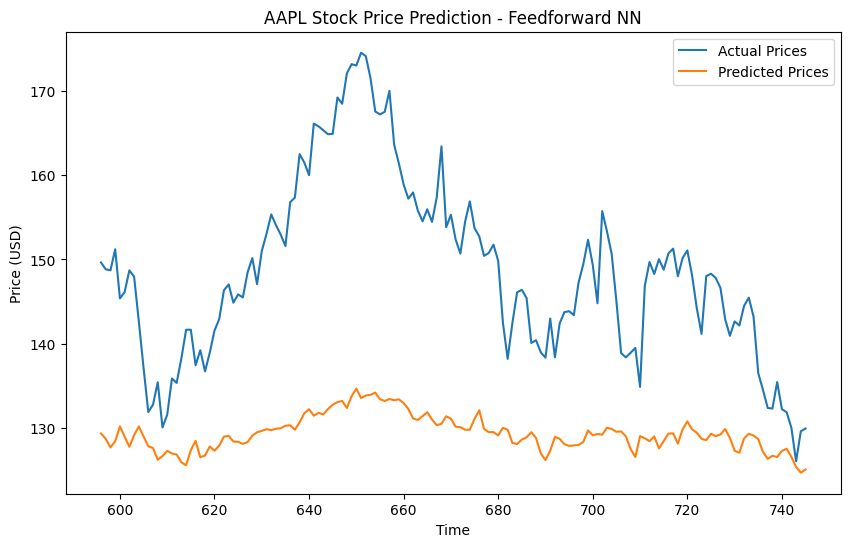

In [ ]:

# 7. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Prices')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_preds, label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction - Feedforward NN')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#Stock Price Prediction using LSTM

##Define LSTM Model

In [ ]:
import yfinance as yf
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 3. Define the LSTM Model
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

##Download stock data and prepare the dataset from Yahoo Finance



In [ ]:
# 1. Download stock data from Yahoo Finance
def load_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].values  # We'll use the 'Close' price for forecasting
    return stock_data

# 2. Prepare the dataset from stock prices
def create_stock_data(seq_length, stock_prices):
    data = []
    for i in range(len(stock_prices) - seq_length):
        data.append((stock_prices[i:i + seq_length], stock_prices[i + seq_length]))
    return np.array(data, dtype=object)
# 4. Prepare the stock data
ticker = 'AAPL'  # Example: Apple stock
start_date = '2020-01-01'
end_date = '2023-01-01'

stock_data = load_stock_data(ticker, start_date, end_date)
seq_length = 10  # Number of previous time steps to consider for prediction

# Create the stock price sequences
data = create_stock_data(seq_length, stock_data)

[*********************100%***********************]  1 of 1 completed


##Split into test and train

In [ ]:

# Split into training and testing data (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Convert data to PyTorch tensors
def prepare_tensors(data):
    inputs = []
    targets = []
    for seq, target in data:
        inputs.append(torch.tensor(seq, dtype=torch.float32))
        targets.append(torch.tensor(target, dtype=torch.float32))
    return torch.stack(inputs), torch.stack(targets)

train_inputs, train_targets = prepare_tensors(train_data)
test_inputs, test_targets = prepare_tensors(test_data)


##Train the Model

In [ ]:


# 5. Training the model
model = SimpleLSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100

for epoch in range(epochs):
    for seq, target in zip(train_inputs, train_targets):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        loss = loss_function(y_pred, target)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 11247.033203125
Epoch 10 Loss: 535.0892333984375
Epoch 20 Loss: 134.34286499023438
Epoch 30 Loss: 32.58135223388672
Epoch 40 Loss: 25.520103454589844
Epoch 50 Loss: 3.1480579376220703
Epoch 60 Loss: 55.20683288574219
Epoch 70 Loss: 42.83260726928711
Epoch 80 Loss: 15.223523139953613
Epoch 90 Loss: 7.027078151702881


##Test the Model

In [ ]:
# 6. Testing the model
model.eval()
test_preds = []
for seq in test_inputs:
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        test_preds.append(model(seq).item())

##Plot Predictions

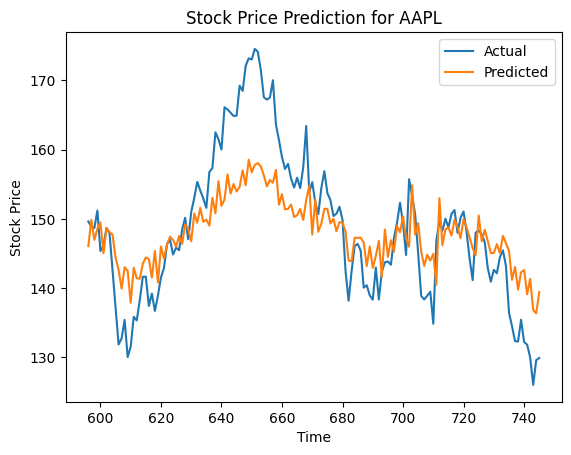

In [ ]:


# 7. Plot the predictions
plt.plot(np.arange(train_size, train_size + len(test_preds)), test_targets.numpy(), label='Actual')
plt.plot(np.arange(train_size, train_size + len(test_preds)), test_preds, label='Predicted')
plt.legend()
plt.title(f"Stock Price Prediction for {ticker}")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()
